In [ ]:
import pygad 
import numpy as np 
from scipy import linalg 
from solver_for_Pocklington_equation import directional_pattern

light_speed, mu0, eps0, incident_voltage, frequency = 299792458., 4*np.pi*1e-7, 8.854e-12, 10, 1e6 * 146
omega = 2 * np.pi * frequency

delta_z = light_speed / frequency / 1e2

k_form, k_max, k_side = 1, 1, 1
E_0 = 0.4 # характерное поле

datas = []

phi = np.linspace(1e-6, 2*np.pi-1e-6, 1000)
aim_func = np.zeros(len(phi))
for i in range(len(phi)): aim_func[i] = max(0,np.sin(np.pi/2-phi[i]))**7 
def fit_form (E_total):
    return np.clip(np.dot(E_total/np.max(E_total),aim_func)/np.linalg.norm(aim_func)/np.linalg.norm(E_total/np.max(E_total)), 0, 1)

def fit_max (E_total):
    return np.clip(1 - E_total[0]/E_0, 0, 1)

def fit_side (E_total):
    return np.clip(np.max(E_total[int(len(phi)/4):int(len(phi)*3/4)])/E_total[0], 0, 1)

def fit_func(ga_instance, solution, solution_idx):
    generation = ga_instance.generations_completed
    
    element_position = np.zeros((num_elements, 3)) 
    element_length = np.zeros(num_elements)           
    for i in range(num_elements):
        element_position[i] = [0, solution[i], 0] 
        element_length[i] = solution[num_elements + i]     
    wire_radius = np.full(num_elements, 3.175e-3)
    source_position = np.array([element_position[0]], dtype=float) 
    
    for i in range(len(element_position)-1):
        for j in range(i+1,len(element_position)): 
            if(abs(element_position[i][1] - element_position[j][1]) <= 10*max(wire_radius[i],wire_radius[j])):
                fit = 1e9
                print(f'Fit: {fit}, Generation: {generation}, Parent Index: {solution_idx}')
                return -fit
    
    R, _, _, _, _, current, _, E_total, phi = directional_pattern (frequency, delta_z, incident_voltage, element_position, element_length, wire_radius, source_position)
    
    fit = k_form * fit_form(E_total) + k_max * fit_max(E_total) + k_side * fit_side(E_total)
    
    data = {
        'fit': fit,
        'element_position': element_position,
        'element_length': element_length,
        'wire_radius': wire_radius,
        'source_position': source_position,
        'currents': current,
        'R': R,
        'Dp': E_total
    }
    datas.append(data)
    print(f'Fit: {fit}, Generation: {generation}, Parent Index: {solution_idx}')
    return -fit

num_elements = 8

num_generations = 2
num_parents_mating = 2
sol_per_pop = 20
num_genes = 2 * num_elements

min_pos, max_pos = 0.0, 1.5 * light_speed / frequency
min_length, max_length = light_speed / frequency * 0.4, light_speed / frequency * 0.55
position_limit = [min_pos, max_pos]  
length_limit = [min_length, max_length]

gene_space = []
for _ in range(num_elements):
    gene_space.append(position_limit)
for _ in range(num_elements):
    gene_space.append(length_limit)
    
initial_population = np.random.uniform(low=[g[0] for g in gene_space], high=[g[1] for g in gene_space], size=(sol_per_pop, num_genes))

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fit_func,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       initial_population=initial_population,
                       gene_space=gene_space,
                       mutation_type='random',
                       parent_selection_type='tournament',
                       crossover_type='single_point',
                       mutation_probability=0.25) 

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Лучшее решение:", solution) 
print("Оценка лучшего решения:", solution_fitness) 

datas = np.array(datas)
np.save('data.npy', datas)

c:\Users\lukas\OneDrive\Документы\Method-of-moment-for-antennas\MyMomVenv\Lib\site-packages\pygad\pygad.py:1139: UserWarning:

The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.



Fit: 1000000000.0, Generation: 0, Parent Index: 0
Fit: 2.0862641433019533, Generation: 0, Parent Index: 1
Fit: 2.2166485477059417, Generation: 0, Parent Index: 2
Fit: 1000000000.0, Generation: 0, Parent Index: 3
Fit: 1000000000.0, Generation: 0, Parent Index: 4
Fit: 1000000000.0, Generation: 0, Parent Index: 5
Fit: 2.2840299088036486, Generation: 0, Parent Index: 6
Fit: 1000000000.0, Generation: 0, Parent Index: 7
Fit: 1000000000.0, Generation: 0, Parent Index: 8
Fit: 1.7973588600160908, Generation: 0, Parent Index: 9
Fit: 2.085212635848359, Generation: 0, Parent Index: 10
Fit: 1000000000.0, Generation: 0, Parent Index: 11
Fit: 1000000000.0, Generation: 0, Parent Index: 12
Fit: 1.850406349891063, Generation: 0, Parent Index: 13
Fit: 1000000000.0, Generation: 0, Parent Index: 14
Fit: 2.2331699299221914, Generation: 0, Parent Index: 15
Fit: 2.1842492681581196, Generation: 0, Parent Index: 16
Fit: 2.0987662721449443, Generation: 0, Parent Index: 17
Fit: 2.176561765569834, Generation: 0, P

In [28]:
import matplotlib.pyplot as plt
delta_z = light_speed / frequency / 5e2
element_position = np.zeros((num_elements, 3)) 
element_length = np.zeros(num_elements)           
for i in range(num_elements):
    element_position[i] = [0, solution[i], 0] 
    element_length[i] = solution[num_elements + i]     
wire_radius = np.full(num_elements, 3.175e-3)
source_position = np.array([element_position[0]], dtype=float) 
R, R_block, element_num, incident_field, impedance, current, current_block, E_total, phi = directional_pattern (frequency, delta_z, incident_voltage, element_position, element_length, wire_radius, source_position)

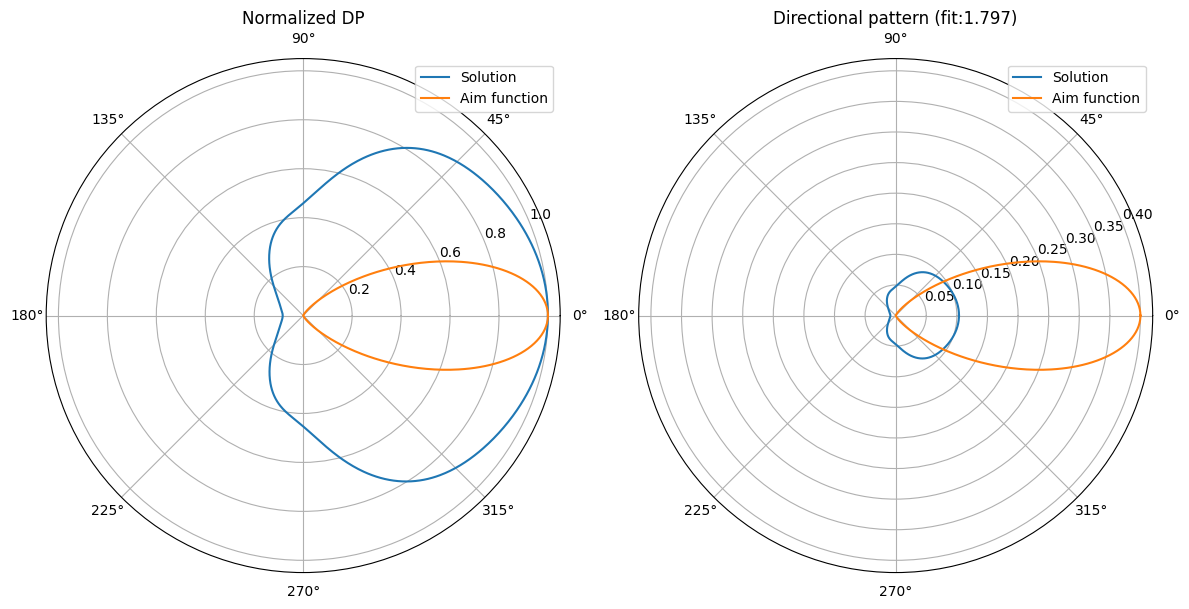

In [29]:

# Создание полярной фигуры
fig = plt.figure(figsize=(12, 6))

# Подграфик 1: Нормированный график
ax1 = fig.add_subplot(121, polar=True)
ax1.plot(phi, E_total / np.max(E_total), label='Solution')
ax1.plot(phi,aim_func, label='Aim function')
ax1.set_title("Normalized DP")
ax1.legend()

# Подграфик 2: Оригинальный график
ax2 = fig.add_subplot(122, polar=True)
ax2.plot(phi, E_total, label='Solution')
ax2.plot(phi, aim_func*E_0, label='Aim function')
ax2.set_title(f"Directional pattern (fit:{-np.round(solution_fitness,3)})")
ax2.legend()

# Отображение графиков
plt.tight_layout()
plt.show()


In [30]:
from visualization import plot_2dmodel, plot_together, plot_separately, current_distribution_2d, current_distribution_3d

#plot_2dmodel(R, source_position, sum(element_num), delta_z)
#plot_together(R_block, current_block)
#plot_separately(R_block, current_block)
current_distribution_2d(R, current)
#current_distribution_3d(R, source_position, R_block, current_block)

In [36]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

datas = np.load('data.npy', allow_pickle=True)

Dps = [data['Dp'] for data in datas]

frames = []
frame_durations = [1] * len(frames)

for Dp in Dps:
    plt.figure(figsize=(6, 6))
    plt.polar(np.linspace(0, 2 * np.pi, len(Dp)), Dp)
    plt.title('Change in Dp')
    
    plt.savefig('temp_frame.png')
    plt.close()
    
    frames.append(imageio.imread('temp_frame.png'))

gif_path = 'animation.gif'
with imageio.get_writer(gif_path, mode='I') as writer:
    for frame, duration in zip(frames, frame_durations):
        writer.append_data(frame, duration=duration)


C:\Users\lukas\AppData\Local\Temp\ipykernel_28016\2441858833.py:20: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



In [37]:
import numpy as np
import imageio

loaded_dicts = np.load('data.npy', allow_pickle=True)

frames = []

for i in range(len(loaded_dicts)):
    
    R = loaded_dicts[i]['R']
    source_position = loaded_dicts[i]['source_position']
    fig, ax = plt.subplots()
    plt.errorbar(np.array(R[:,1]),np.array(R[:,2]), xerr = delta_z, linestyle = "none", marker = '.', markersize = '2', zorder = 10, color = 'blue')
    for i in range (len(R)):
        for k in range (len(source_position)):
            if all(source_position[k] == R[i]):
                plt.errorbar(np.array(R[i,1]),np.array(R[i,2]), xerr = delta_z, linestyle = "none", marker = '.', markersize = '5', zorder = np.inf, color = 'red')
    #* Set limits for axes 
    ax.set_xlim(min(R[:,1])-0.1, max(R[:,1])+0.1)
    ax.set_ylim(min(R[:,2])-0.1, max(R[:,2]+0.1))

    #* Name the axes and graph
    ax.set_title('2D Model of Yagi-Uda Antenna', size = 14)
    ax.set_xlabel('Y position, m', size = 12)
    ax.set_ylabel('Z position, m', size = 12)
    
    plt.savefig('temp_frame.png')
    plt.close() 
    
    frames.append(imageio.imread('temp_frame.png'))

imageio.mimsave('evalution_of_positions.gif', frames, duration=0.7)  



C:\Users\lukas\AppData\Local\Temp\ipykernel_28016\183532337.py:30: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.

